In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data = pd.read_csv('../Data/anpc-2016.csv')

/tmp/ipykernel_23224/377508089.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/anpc-2016.csv')


<Axes: xlabel='Numero'>

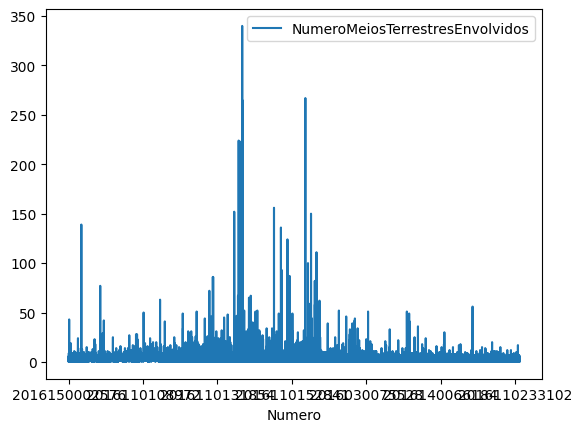

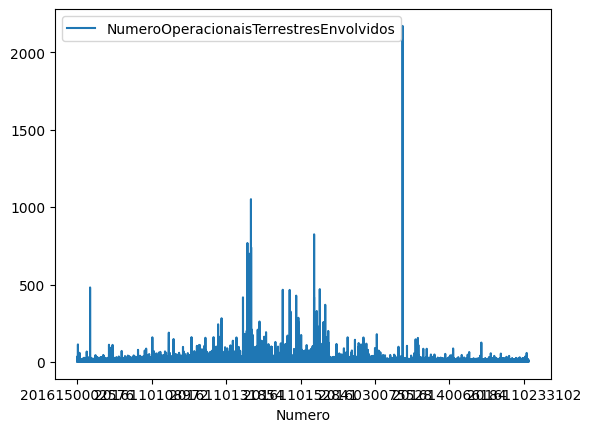

In [9]:
data.plot(x='Numero', y='NumeroMeiosTerrestresEnvolvidos')
data.plot(x='Numero', y='NumeroOperacionaisTerrestresEnvolvidos')

In [11]:
for key in data.columns:
    print(key)
    print(data[key].value_counts())

Numero
Numero
\t\t\t\t\t\t\t\t    2
2016150002576       1
2016030076151       1
2016150086519       1
2016120020850       1
                   ..
2016040021667       1
2016040021666       1
2016040021664       1
2016040021665       1
2016030098141       1
Name: count, Length: 121186, dtype: int64
DataOcorrencia
DataOcorrencia
23/08/2016 11:00:00    19
26/07/2016 13:00:00    19
25/08/2016 13:00:00    17
19/07/2016 11:00:00    17
23/08/2016 13:00:00    17
                       ..
08/08/2016 03:49:00     1
08/08/2016 03:55:00     1
08/08/2016 04:09:00     1
08/08/2016 04:10:00     1
31/12/2016 00:06:00     1
Name: count, Length: 88321, dtype: int64
DataFechoOperacional
DataFechoOperacional
22/12/2016 01:00:00    254
16/07/2016 18:14:49    172
23/07/2016 01:00:00     59
10/08/2016 01:00:00     52
11/08/2016 01:00:00     44
                      ... 
09/08/2016 03:42:00      1
09/08/2016 02:01:00      1
10/08/2016 02:39:47      1
09/08/2016 02:24:00      1
31/12/2016 01:10:00      1
Name: 

In [83]:
# clean data and count length
import pandas as pd

def clean_data(df, remove_false_alarms=True) -> pd.DataFrame:
    print('df initial length: ', len(df))

    data_clean = df[df['Natureza'] != '1']
    data_clean = data_clean[data_clean['EstadoOcorrencia'] != '2']
    data_clean = data_clean[data_clean['Distrito'] != '0']
    data_clean = data_clean[data_clean['Concelho'] != '0']
    data_clean = data_clean[data_clean['Numero'] != """\t\t\t\t\t\t\t\t"""]
    # data_clean = data_clean[data_clean['EstadoOcorrencia'] != 'Falso Alerta']
    # data_clean = data_clean[data_clean['EstadoOcorrencia'] != 'Falso Alarme']
    data_clean = pd.concat([data_clean[data_clean['EstadoOcorrencia'] == 'Encerrada'], data_clean[data_clean['EstadoOcorrencia'] == 'Falso Alarme']])

    # We replace the "," with "." to facilitate processing
    data_clean['Latitude'] = pd.to_numeric(
        data_clean['Latitude'].str.replace(',', '.')
    )
    data_clean['Longitude'] = pd.to_numeric(
        data_clean['Longitude'].str.replace(',', '.')
    )    

    print(data_clean['Longitude'][0], ' :', type(data_clean['Longitude'][0]))
    print(data_clean['Latitude'][0], ' :', type(data_clean['Latitude'][0]))

    data_clean['DataOcorrencia'] = pd.to_datetime(data_clean['DataOcorrencia'], format='%d/%m/%Y %H:%M:%S').dt.date
    data_clean['DataFechoOperacional'] = pd.to_datetime(data_clean['DataFechoOperacional'], format='%d/%m/%Y %H:%M:%S').dt.date

    print(data_clean['DataOcorrencia'][0], ' :', type(data_clean['DataOcorrencia'][0]))
    print(data_clean['DataFechoOperacional'][0], ' :', type(data_clean['DataFechoOperacional'][0]))

    if remove_false_alarms == True:
        data_clean = data_clean[data_clean['EstadoOcorrencia'] != 'Falso Alarme']

    print('df length: ', len(data_clean))

    return data_clean

In [84]:
data_clean = clean_data(data)


df initial length:  121187
df length:  120575
-9.002235449  : <class 'numpy.float64'>
38.68091202  : <class 'numpy.float64'>
2016-01-09  : <class 'datetime.date'>
df length:  118169
